In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image
import cv2
import glob
%matplotlib inline
from IPython.display import display, Image

In [2]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [3]:
#Negative images in train set

path = glob.glob("C:/Users/sushi/OneDrive/Desktop/Covid classifier/CovidDataset/Train/Normal/*")
prefix = "C:/Users/sushi/OneDrive/Desktop/Covid classifier/CovidDataset/Train/Normal"

img_array = []

for file in path:
    img_name = file[len(prefix) + 1::1]
    img_array.append(img_name)

In [4]:
print("Negative images in train set: " + ((str)(len(path))) )

Negative images in train set: 112


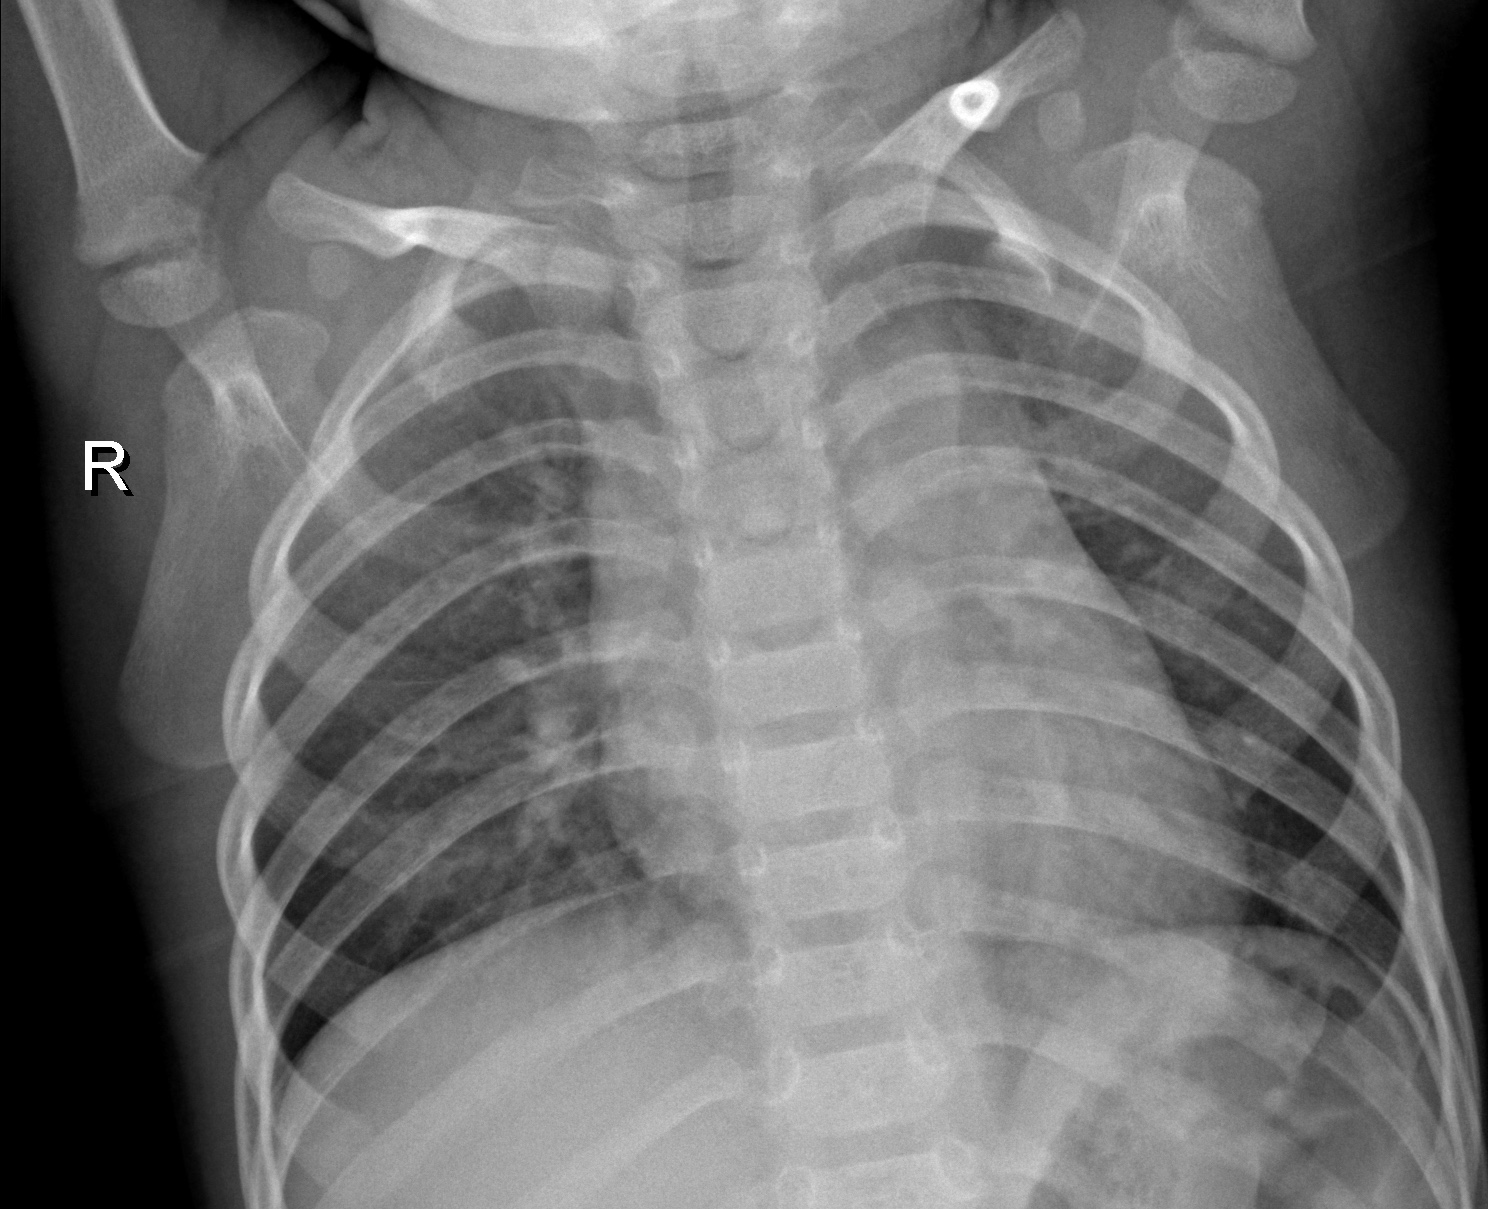

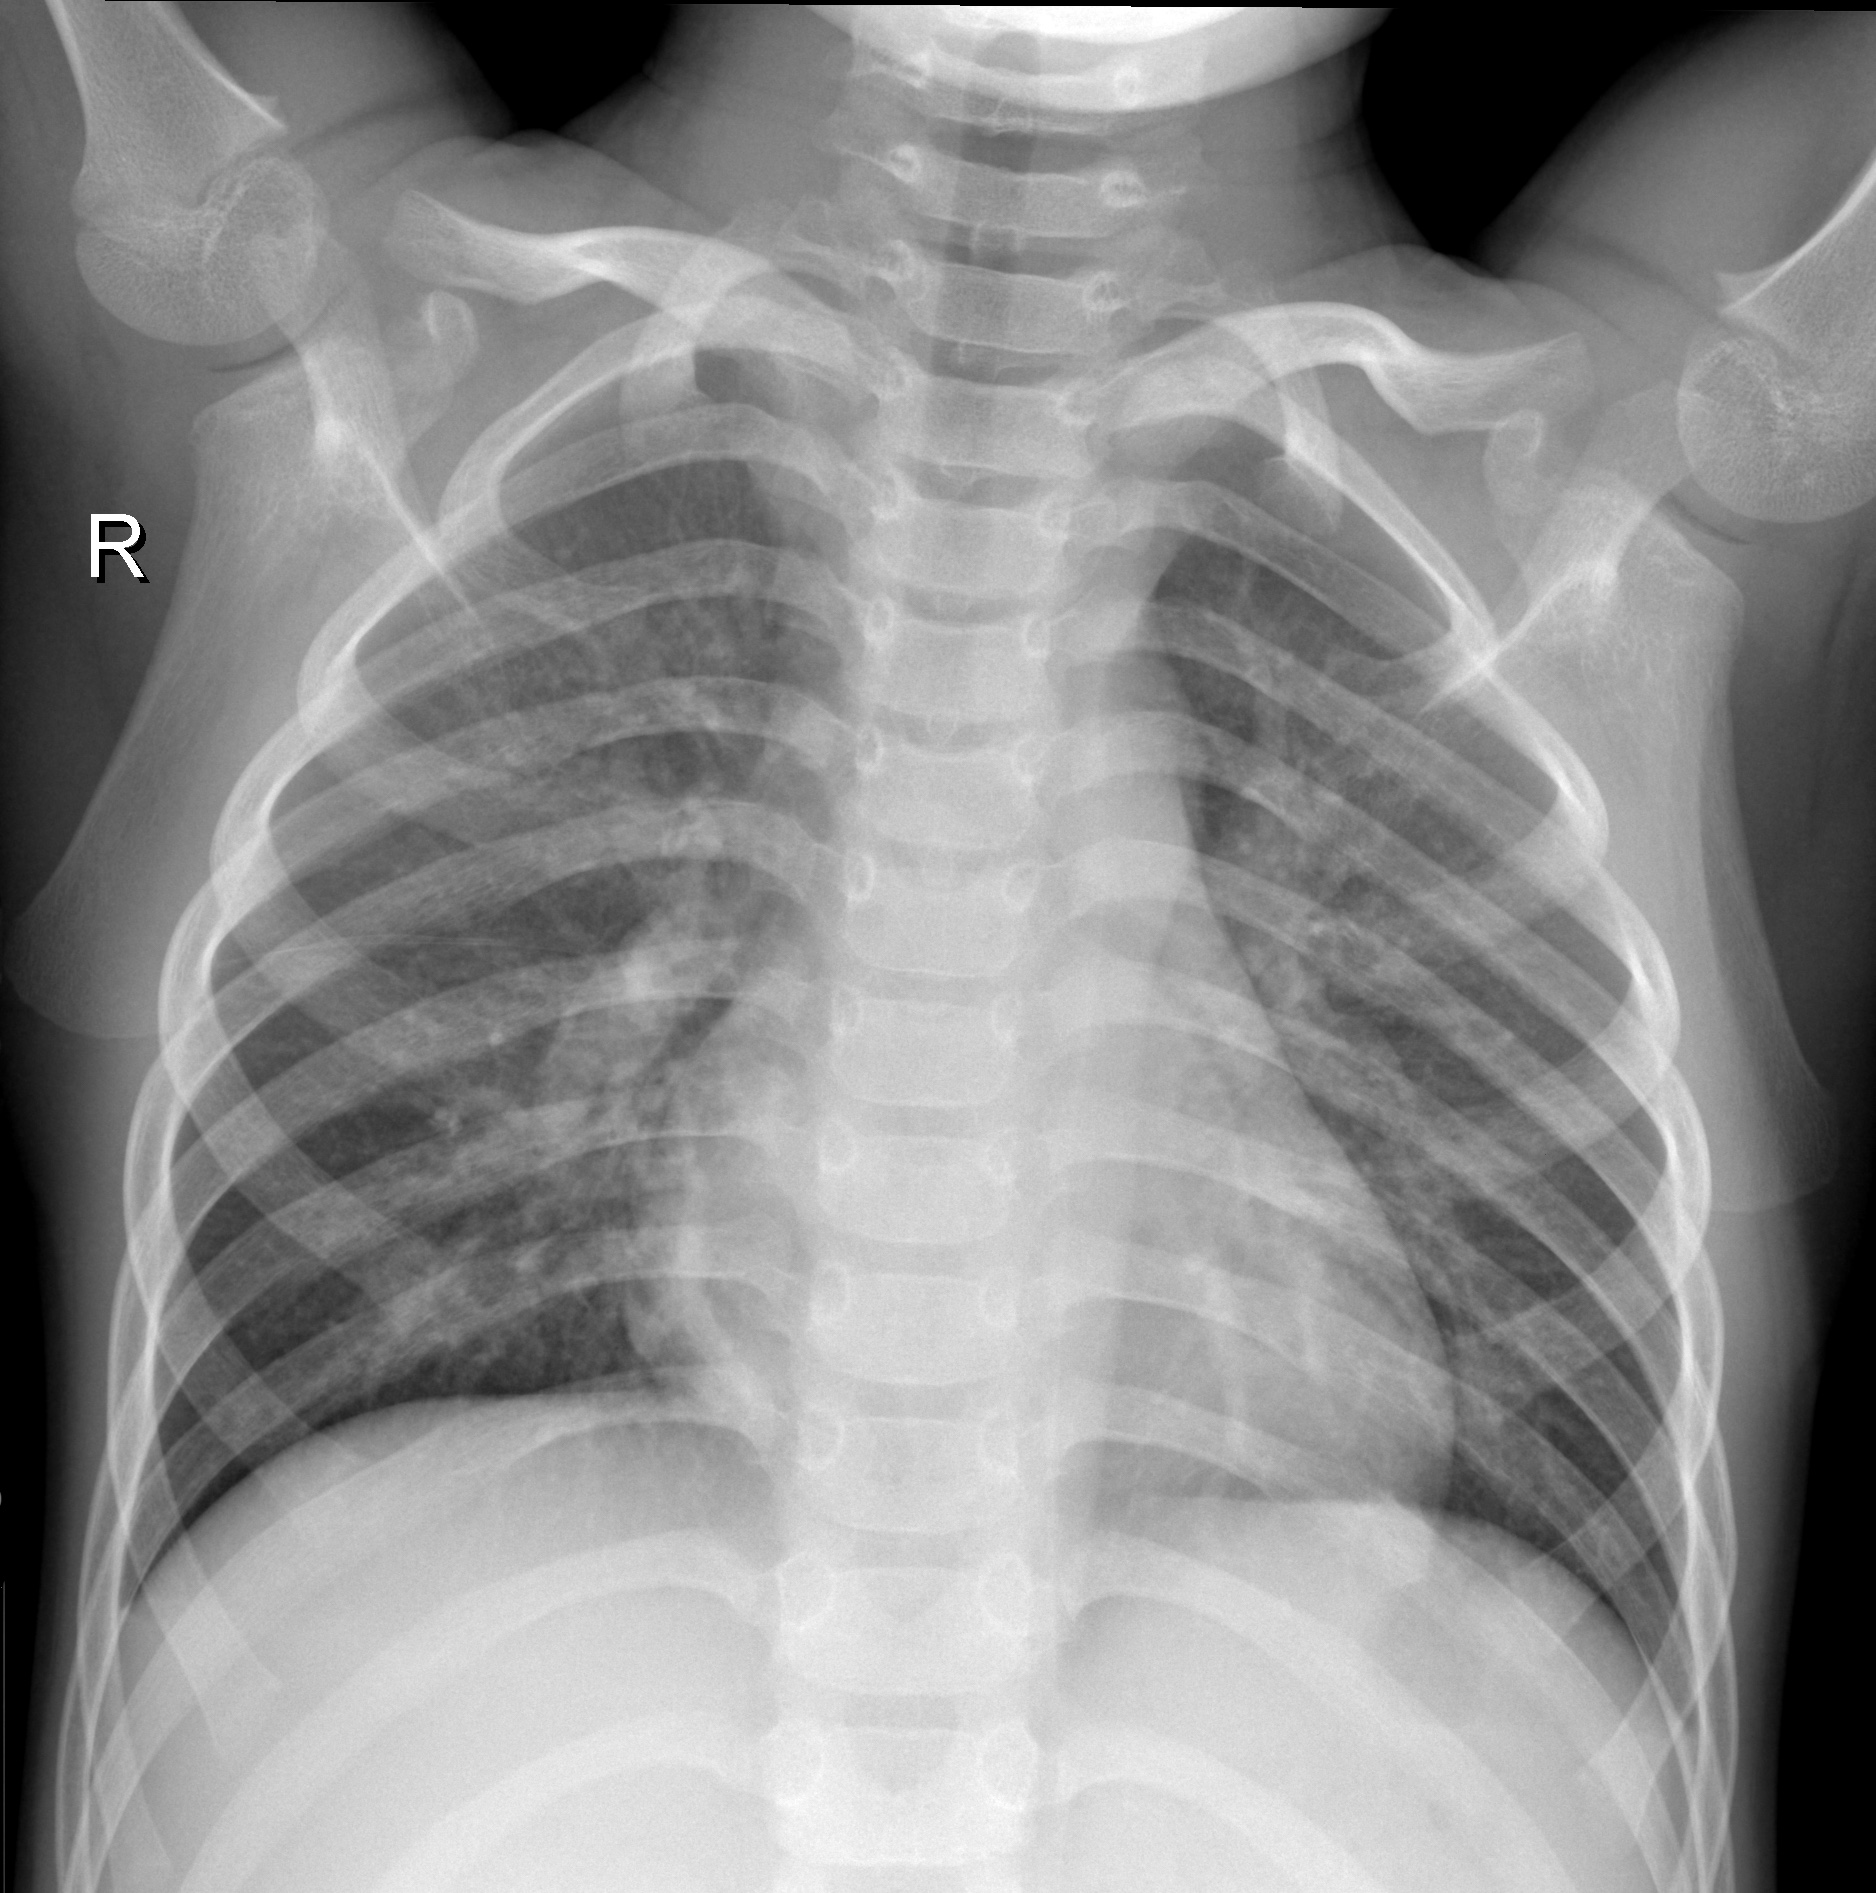

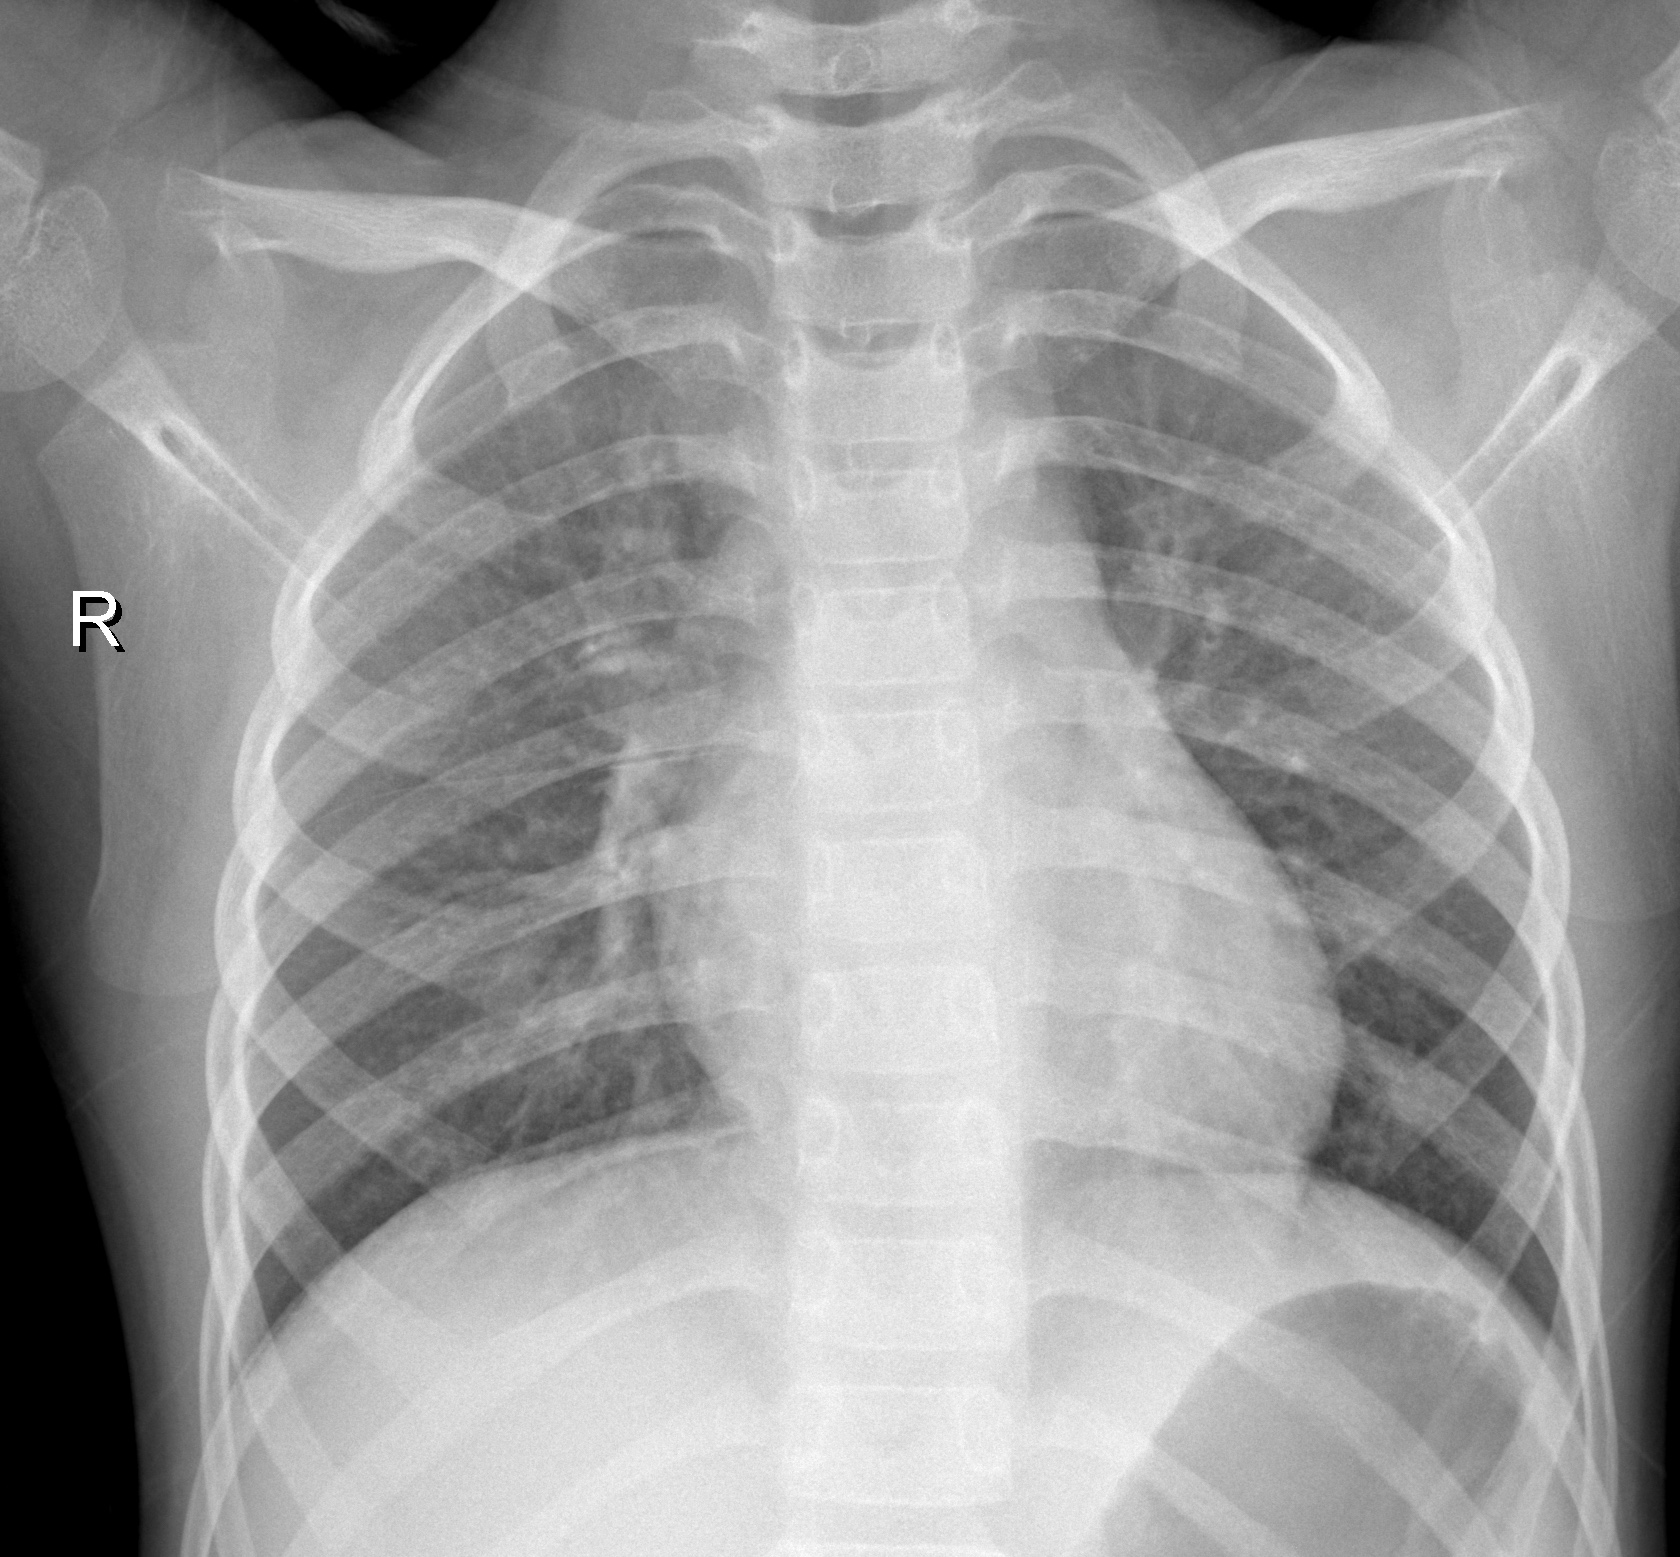

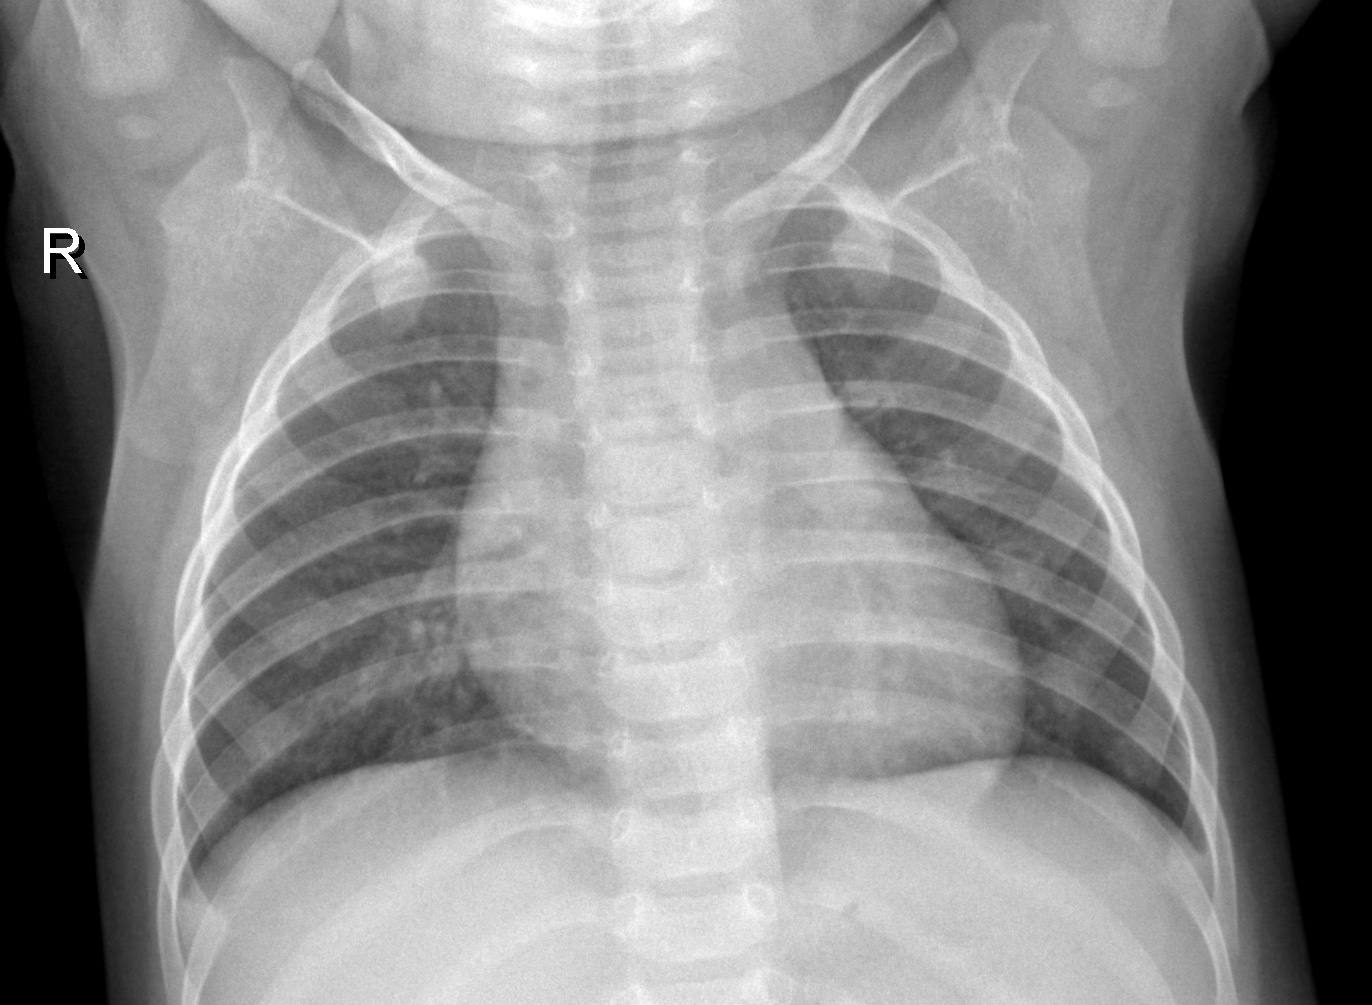

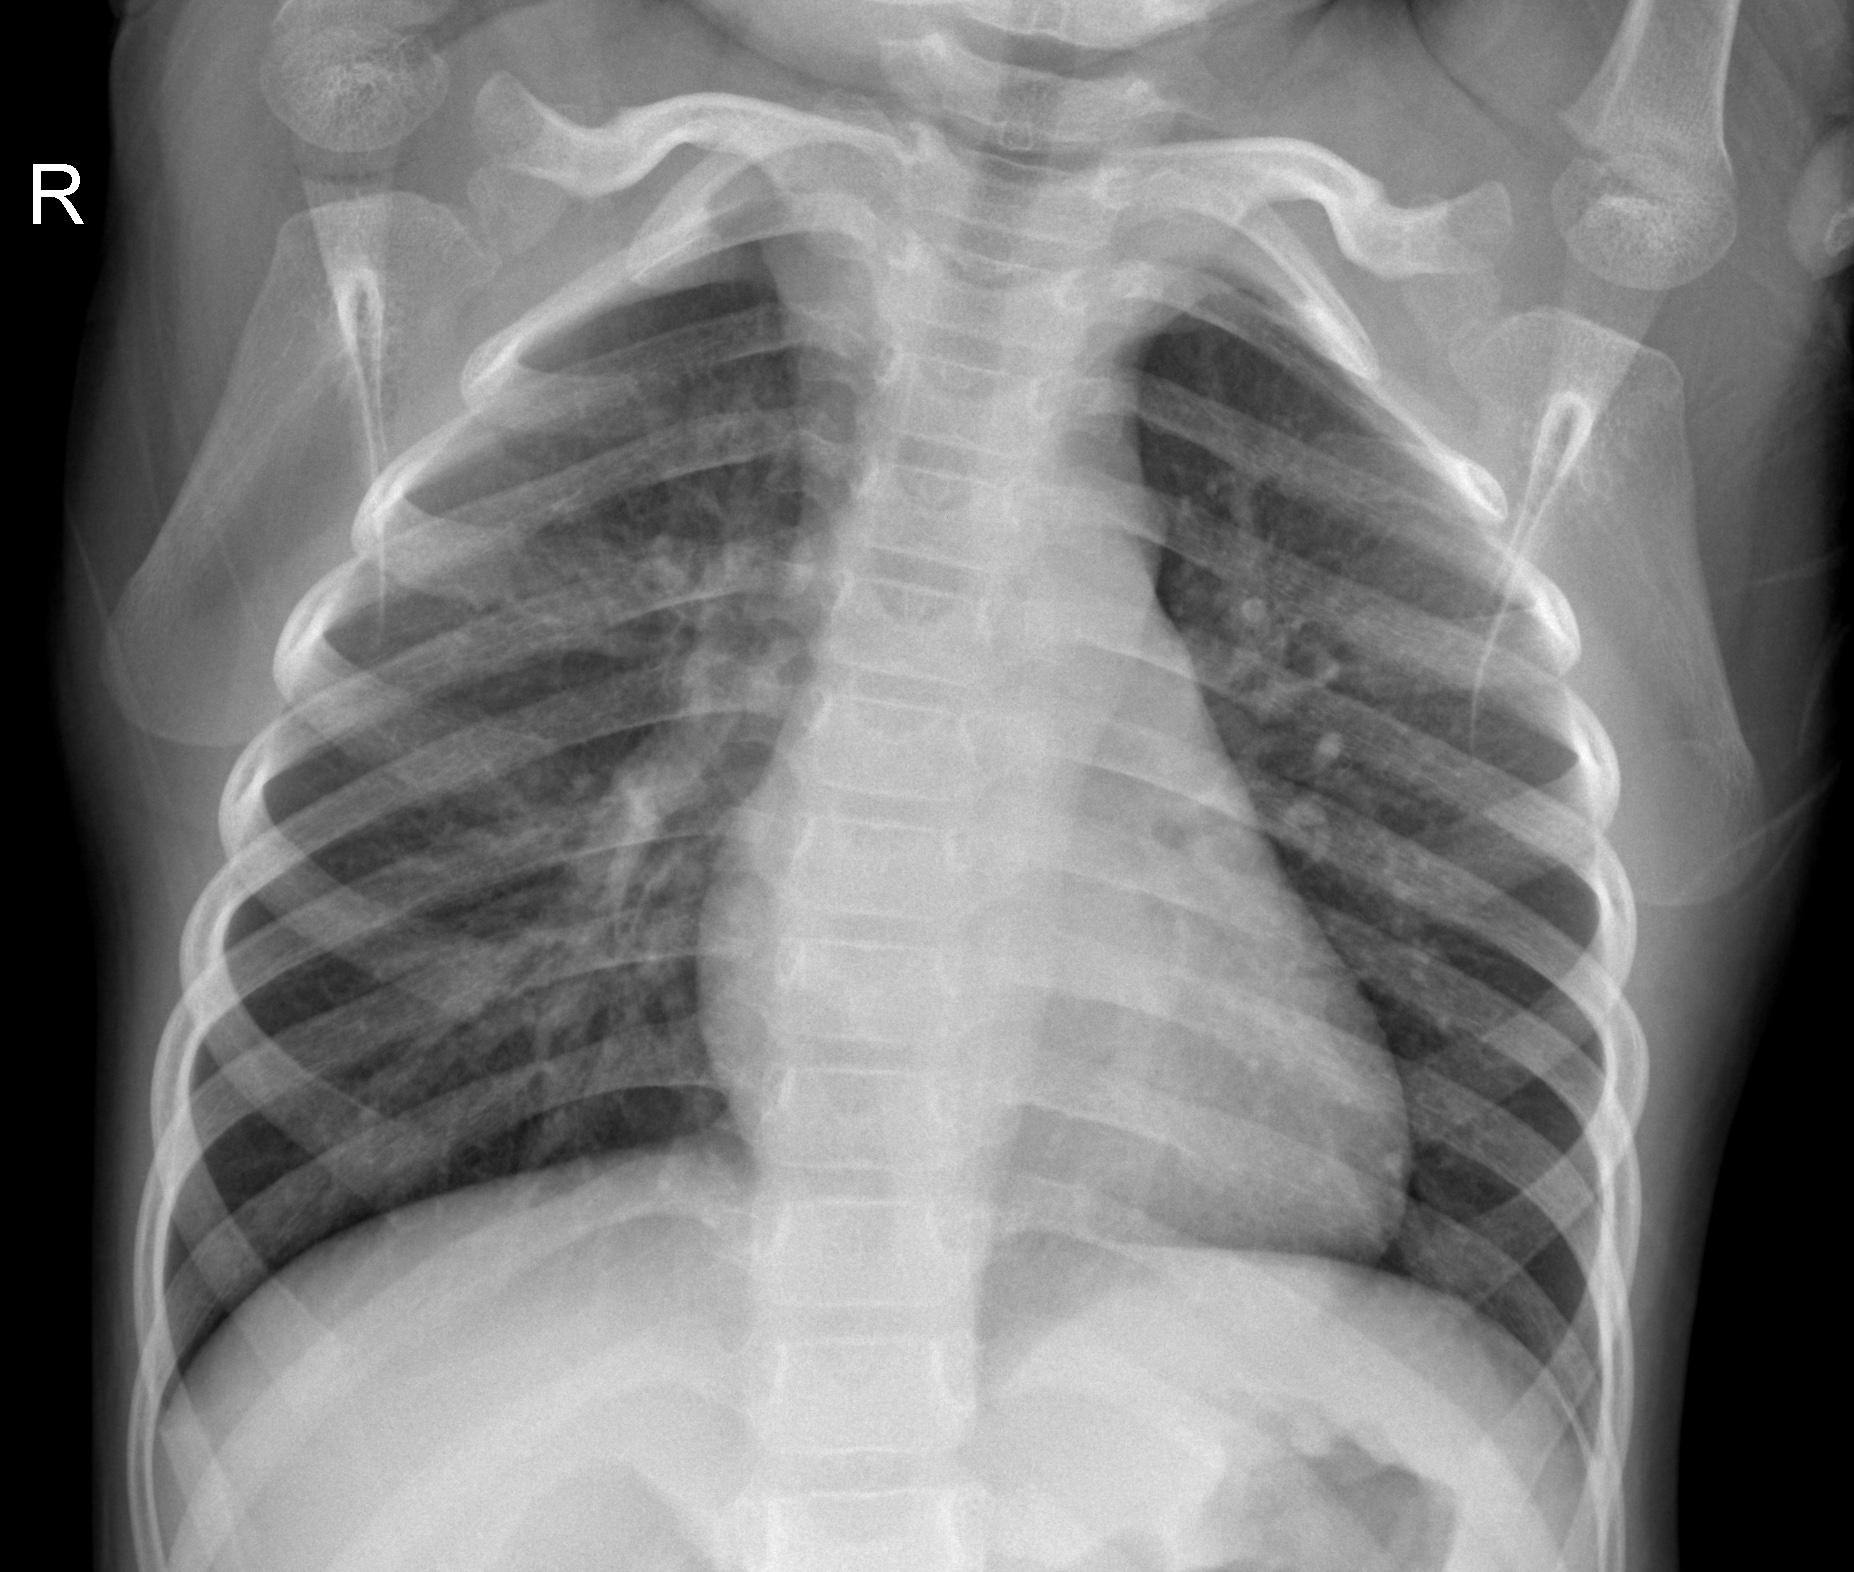

In [5]:
# laod 5 images
for i in range(0,5):
    display(Image(prefix + "/" + img_array[i] ))

In [6]:
#Negative images in test set

path = glob.glob("C:/Users/sushi/OneDrive/Desktop/Covid classifier/CovidDataset/Val/Normal/*")
prefix = "C:/Users/sushi/OneDrive/Desktop/Covid classifier/CovidDataset/Val/Normal"
for file in path:
    img_name = file[len(prefix) + 1::1]

In [7]:
print("Negative images in test set: " + ((str)(len(path))))

Negative images in test set: 30


In [8]:
#Positive images in train set

path = glob.glob("C:/Users/sushi/OneDrive/Desktop/Covid classifier/CovidDataset/Train/Covid/*")
prefix = "C:/Users/sushi/OneDrive/Desktop/Covid classifier/CovidDataset/Train/Covid"
for file in path:
    img_name = file[len(prefix)::1]
    
img_array = []

for file in path:
    img_name = file[len(prefix) + 1::1]
    img_array.append(img_name)

In [9]:
print("Positive images in train set: " + (str)(len(path)))

Positive images in train set: 112


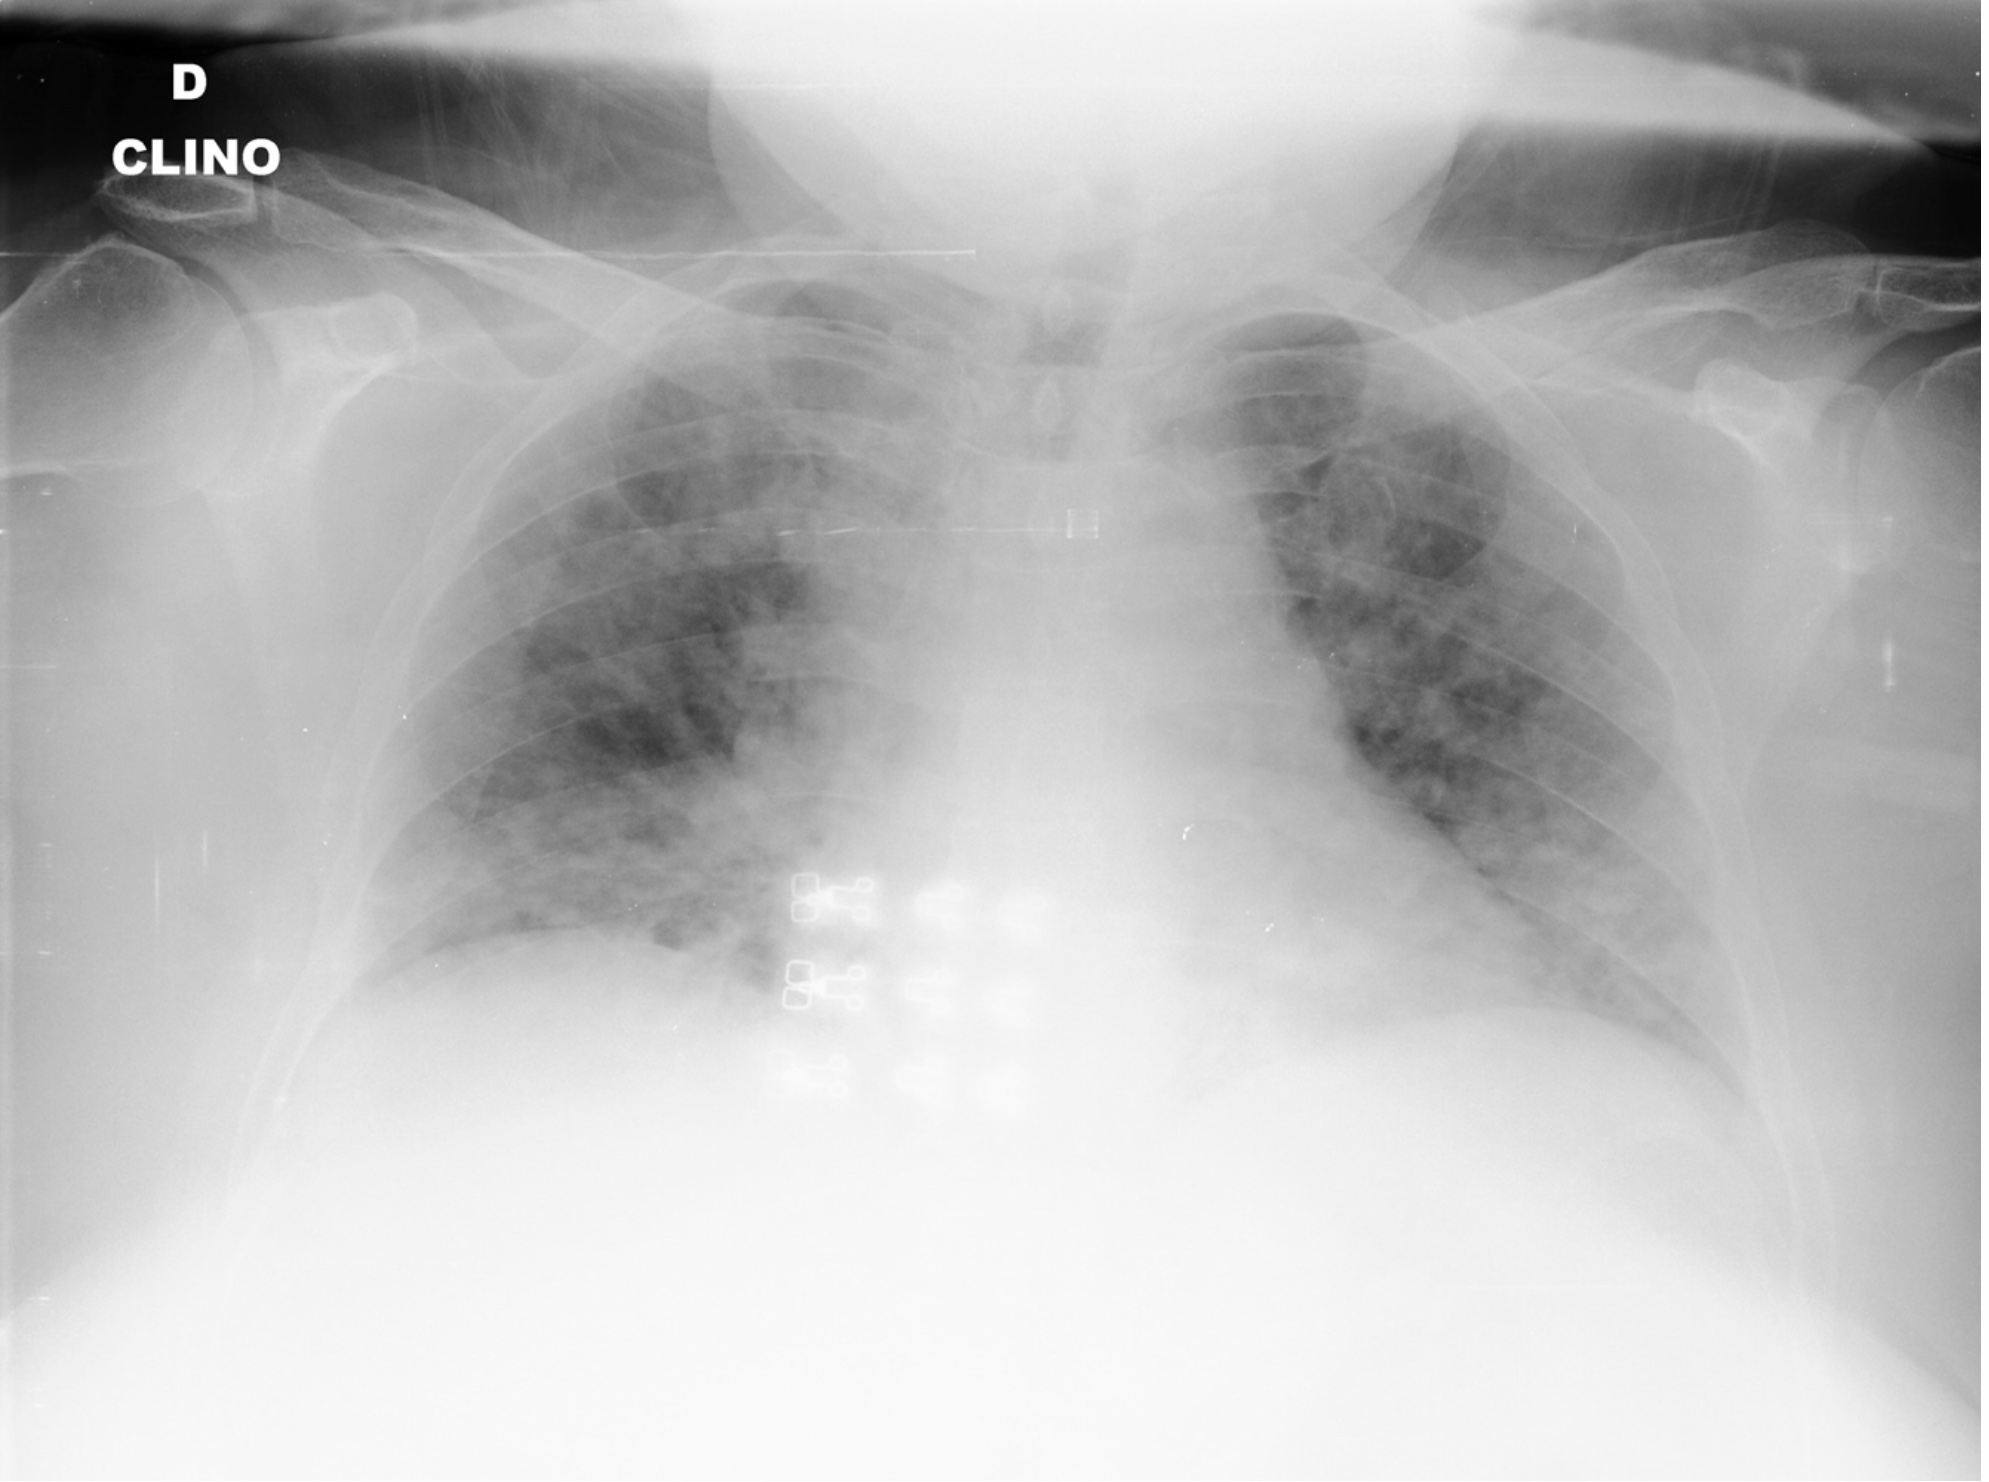

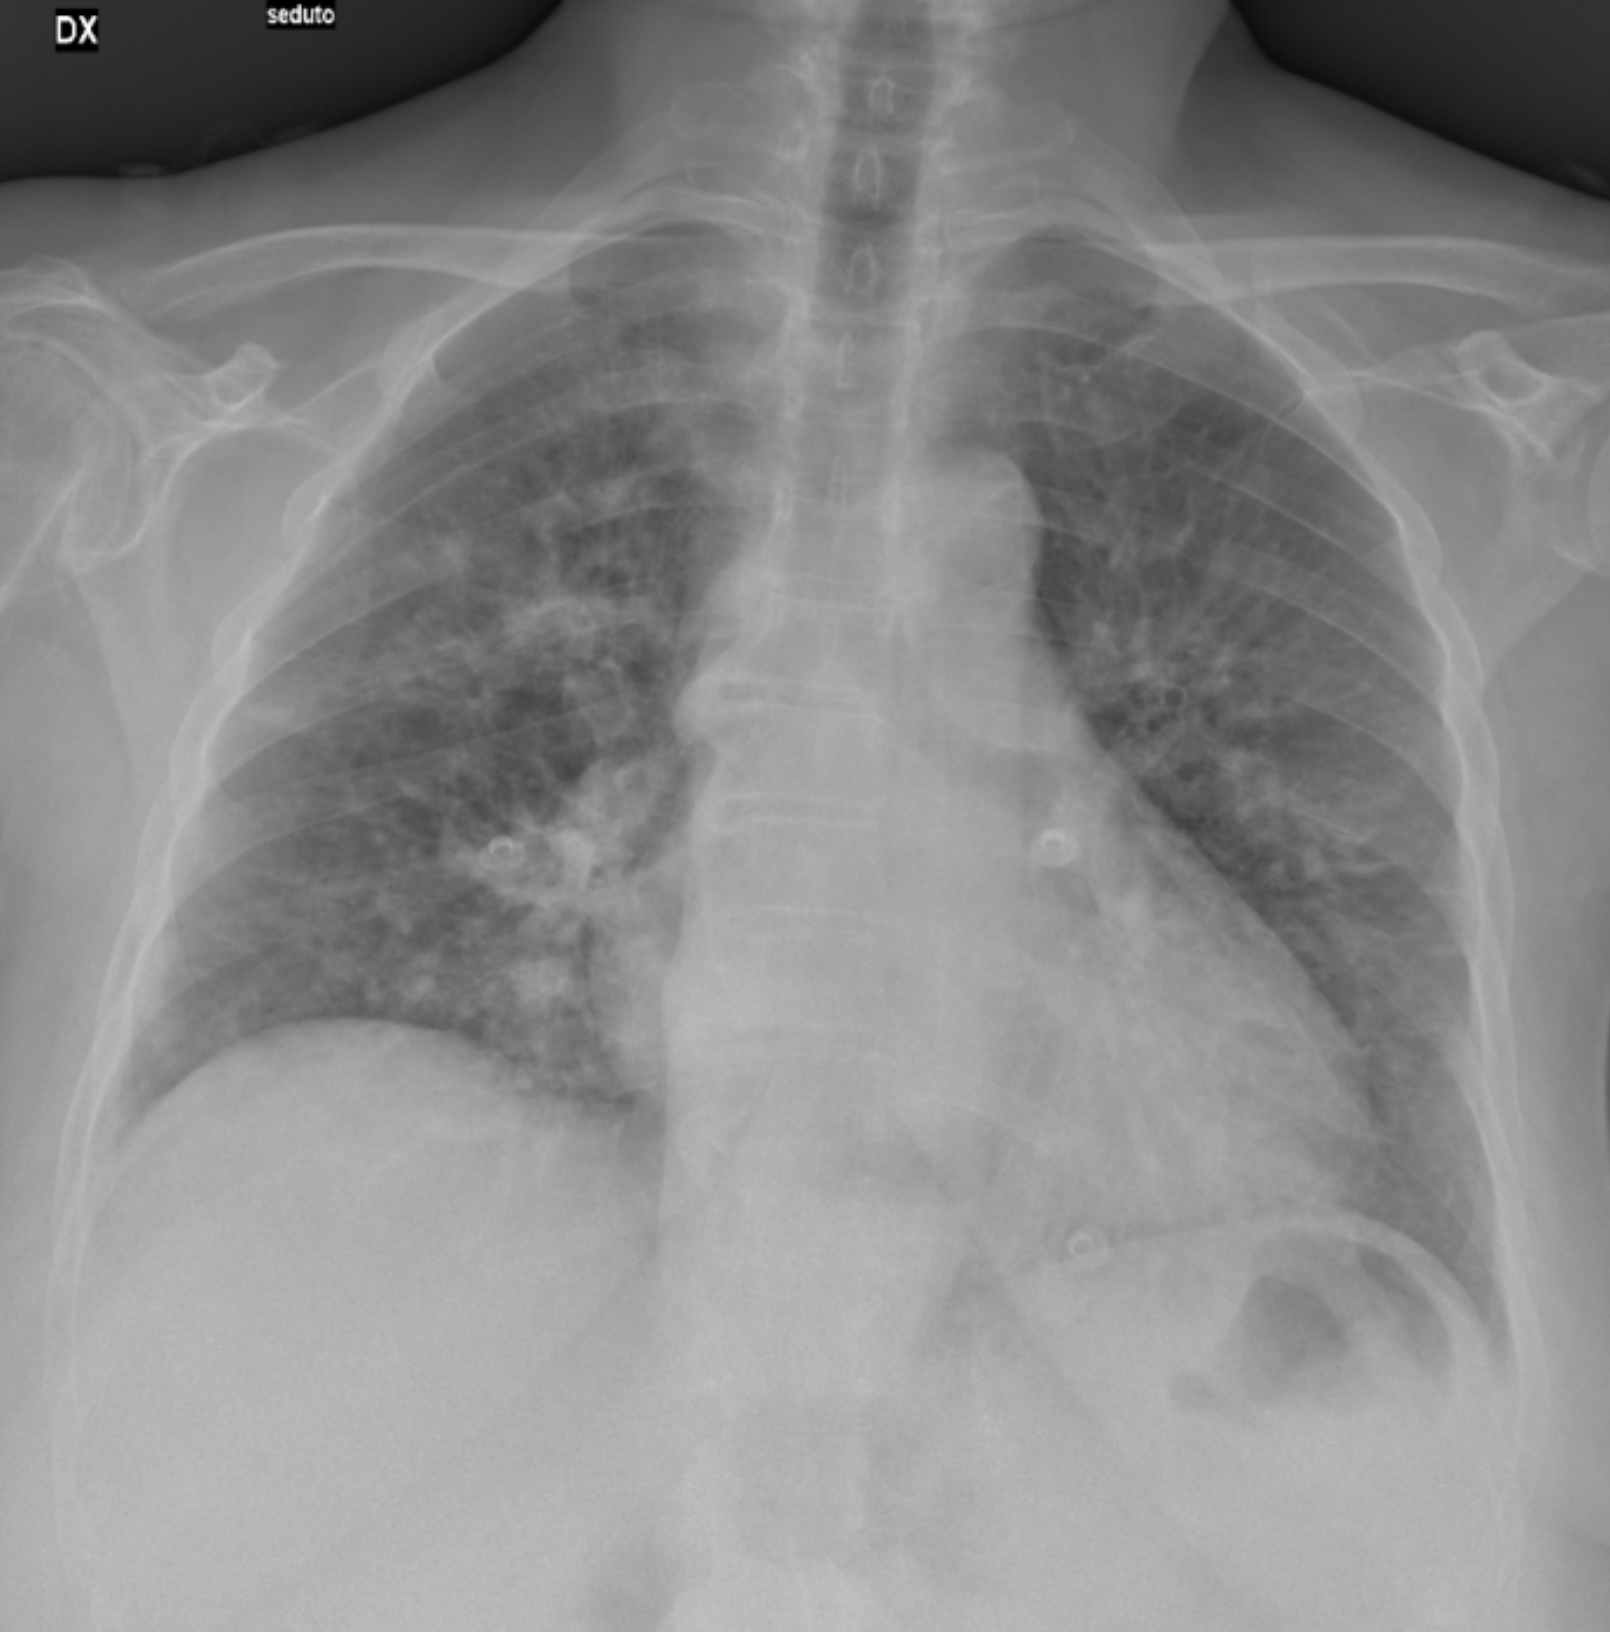

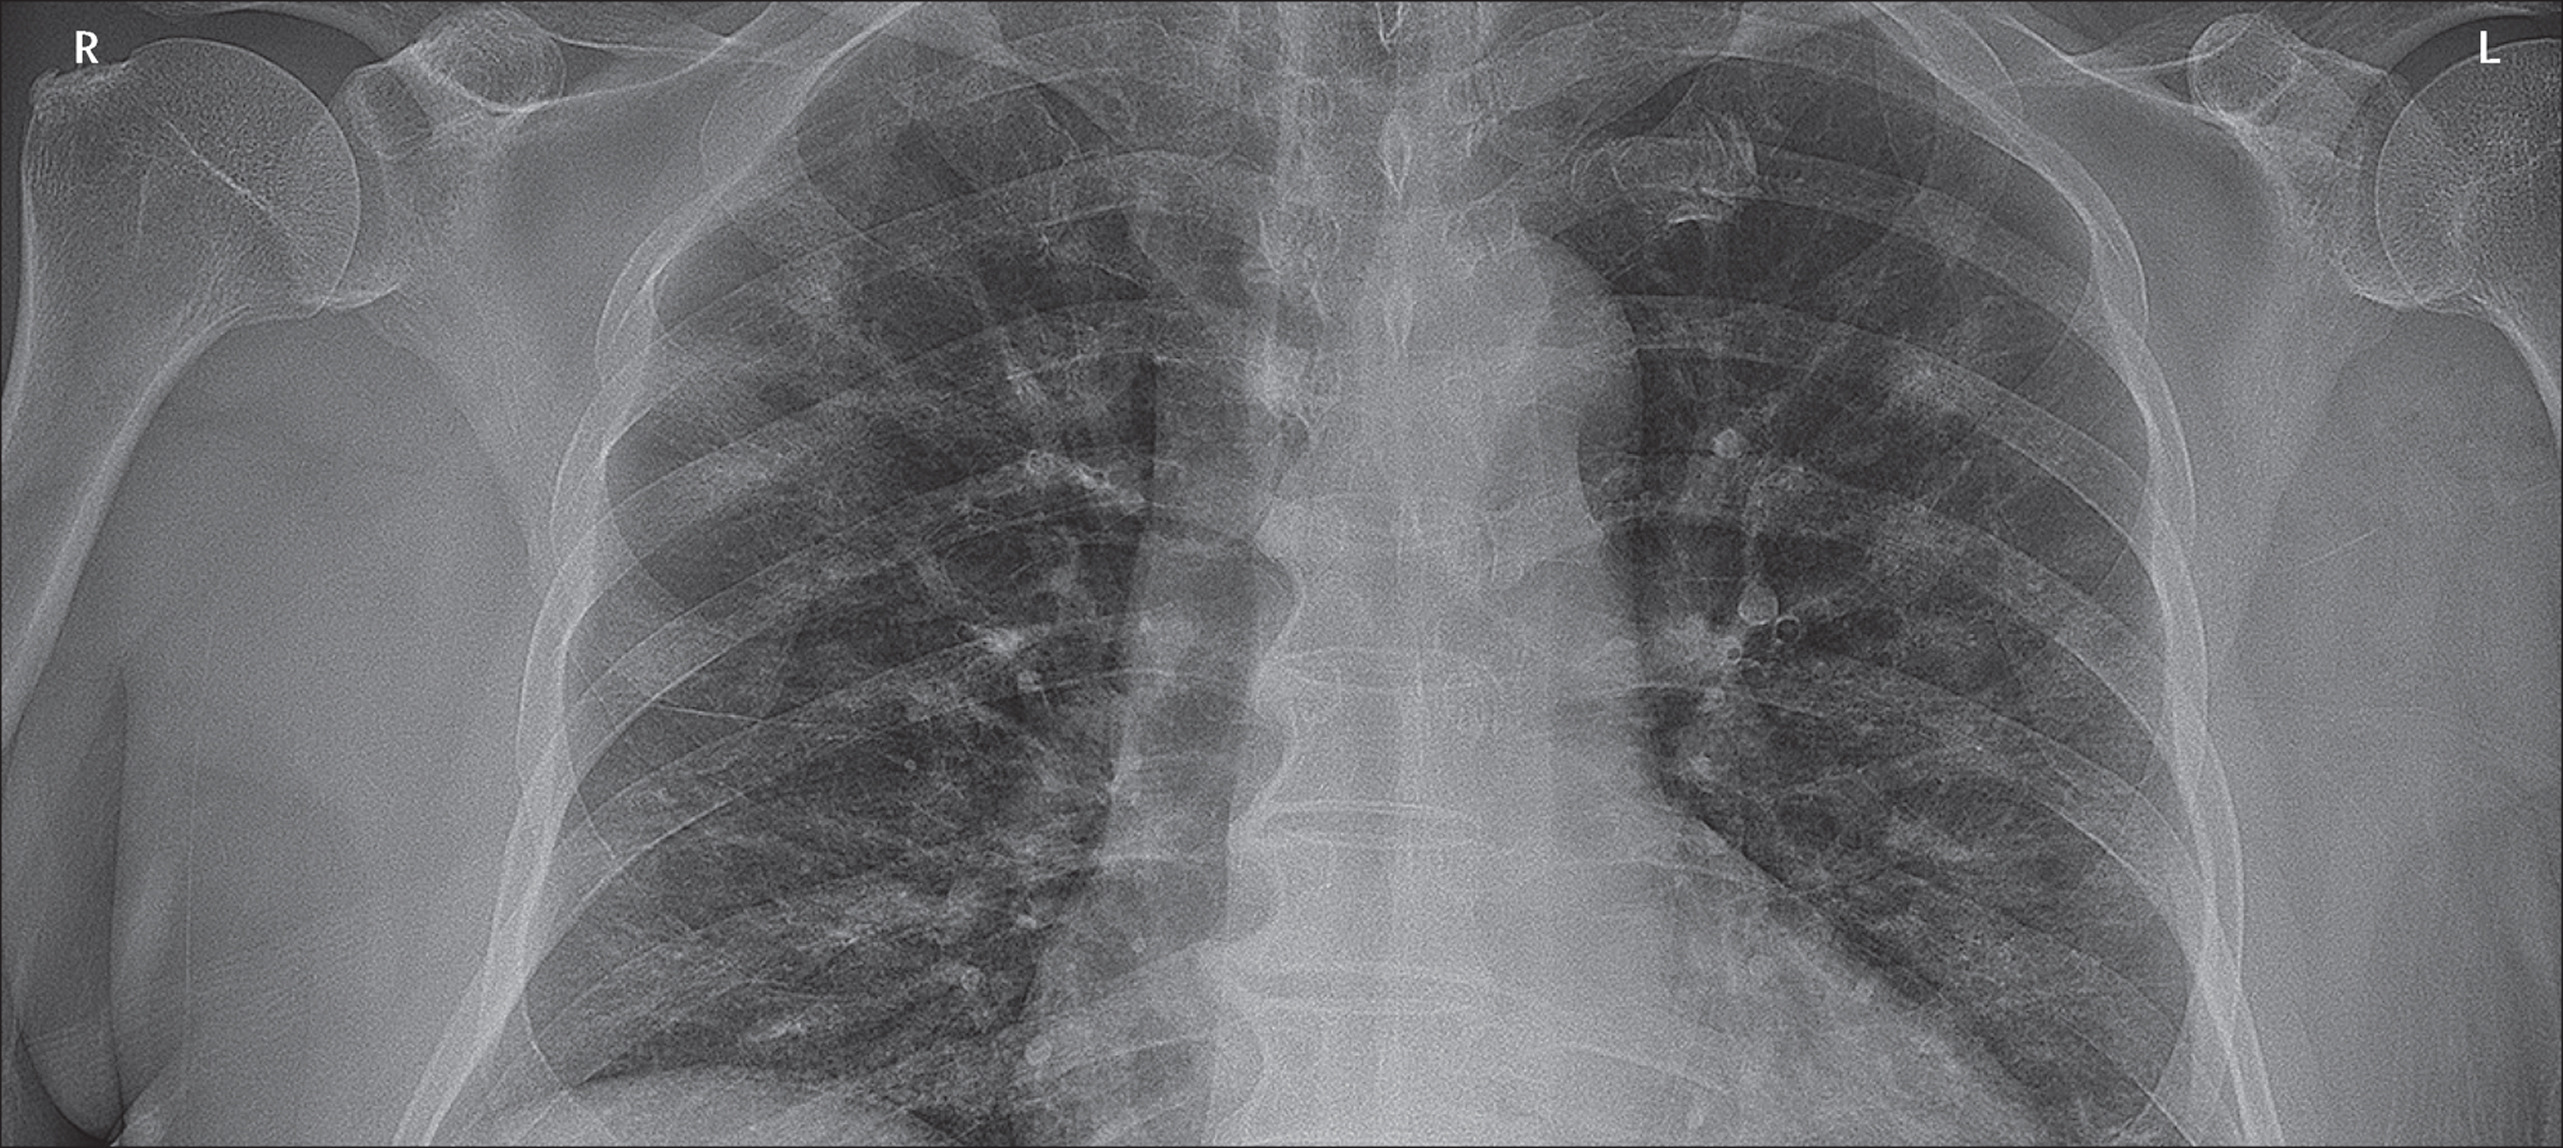

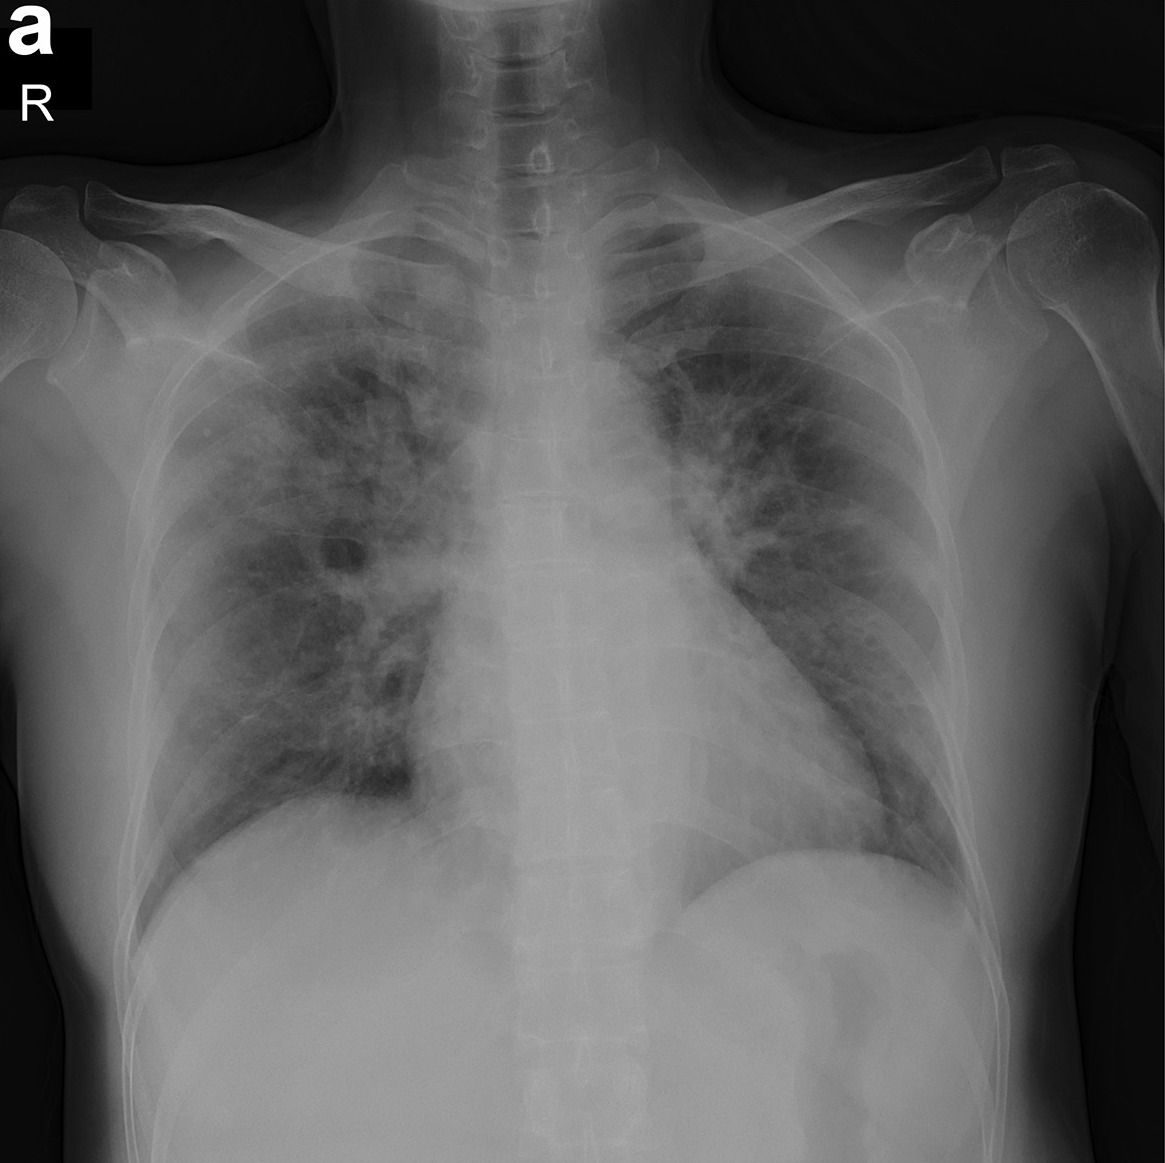

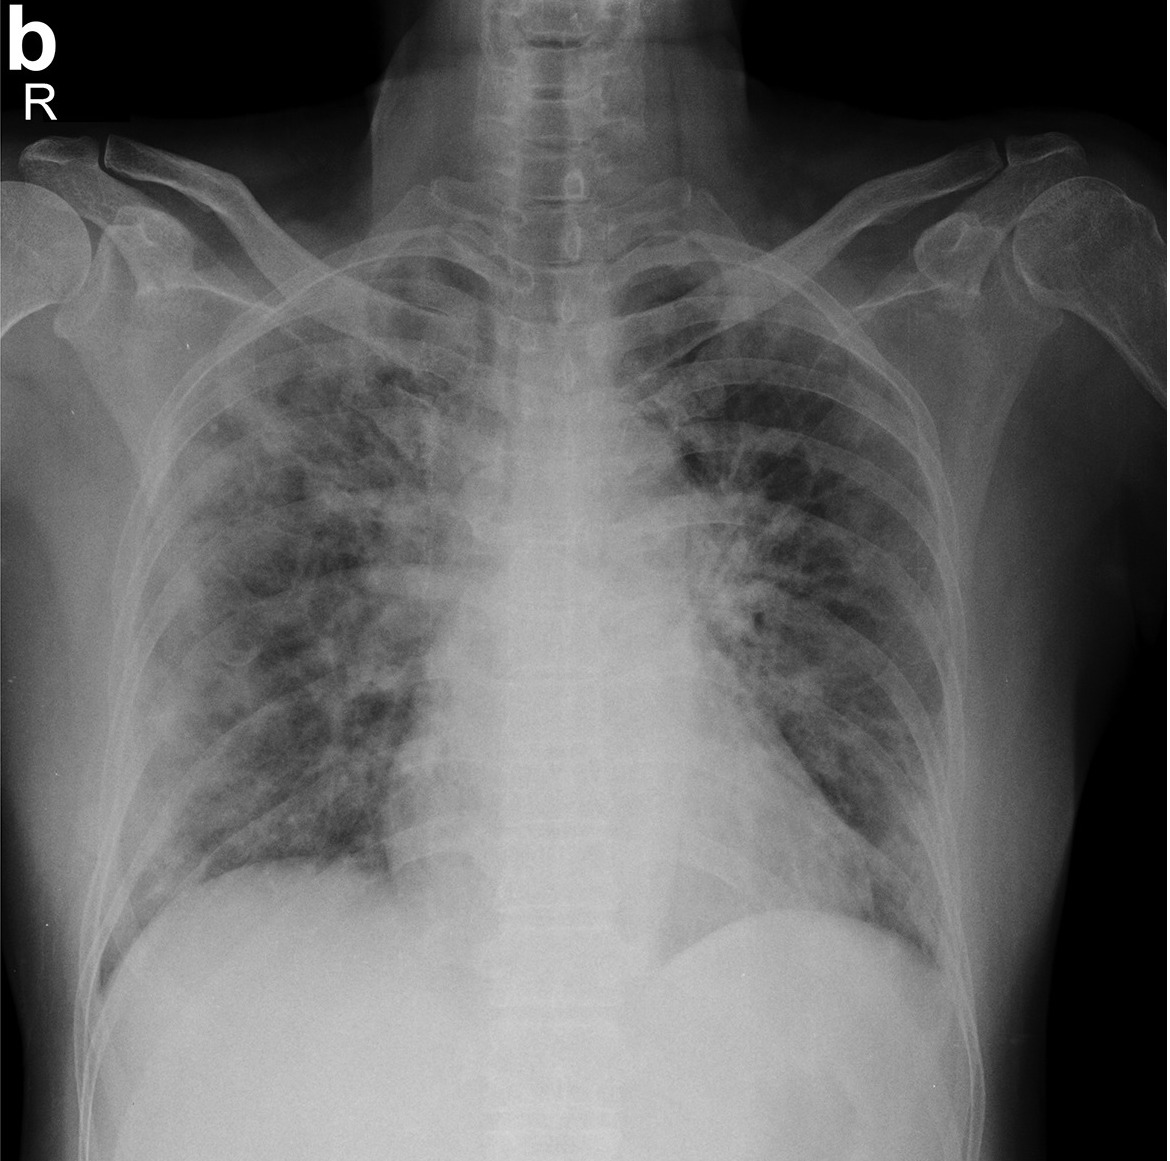

In [10]:
# laod 5 images
for i in range(0,5):
    display(Image(prefix + "/" + img_array[i] ))

In [11]:
#Positive images in train set

path = glob.glob("C:/Users/sushi/OneDrive/Desktop/Covid classifier/CovidDataset/Val/Covid/*")
prefix = "C:/Users/sushi/OneDrive/Desktop/Covid classifier/CovidDataset/Val/Covid"
for file in path:
    img_name = file[len(prefix)::1]
    
img_array = []

for file in path:
    img_name = file[len(prefix) + 1::1]
    img_array.append(img_name)
    
print("Positive images in Test set: " + (str)(len(path)))

Positive images in Test set: 30


In [12]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [14]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [15]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.


In [16]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [17]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [18]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=7,
    epochs = 10,
    validation_data = validation_generator
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
7/7 [==============================] - 29s 4s/step - loss: 0.8331 - accuracy: 0.5848 - val_loss: 0.6538 - val_accuracy: 0.8667
Epoch 2/10
7/7 [==============================] - 24s 3s/step - loss: 0.5677 - accuracy: 0.7098 - val_loss: 0.5147 - val_accuracy: 0.9333
Epoch 3/10
7/7 [==============================] - 25s 4s/step - loss: 0.3434 - accuracy: 0.8571 - val_loss: 0.3141 - val_accuracy: 0.9333
Epoch 4/10
7/7 [==============================] - 27s 4s/step - loss: 0.2560 - accuracy: 0.9196 - val_loss: 0.3055 - val_accuracy: 0.9667
Epoch 5/10
7/7 [==============================] - 44s 6s/step - loss: 0.2047 - accuracy: 0.9107 - val_loss: 0.1313 - val_accuracy: 0.9833
Epoch 6/10
7/7 [==============================] - 27s 4s/step - loss: 0.1661 - accuracy: 0.9464 - val_loss: 0.0703 - val_accuracy: 0.9833
Epoch 7/10
7/7 [==============================] - 30s 4s/step - loss: 0.1636 - accuracy: 0.9554 

In [ ]:
file_name = "model1.h5"
model.save(file_name)

In [3]:
from keras.models import load_model
model = load_model("model1.h5")

In [5]:
img = image.load_img("./CovidDataset/Train/Covid/" + "1-s2.0-S1684118220300608-main.pdf-002.jpg", target_size = (224,224))
#img = image.load_img("C:/Users/sushi/Downloads/1.jpeg", target_size = (224,224))
img = image.img_to_array(img)
img = np.expand_dims(img,axis = 0)
p = model.predict_classes(img)
print(p)

[[0]]
